# Intelligence Artificielle - TD KNN

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

## Dataset
* Load iris dataset.
* To ease things, you can start with only one feature. Don't forget to use all features at the end.
* Split in train/test.

In [2]:
# import some data to play with
iris = datasets.load_iris()

# Summarize data

### TODO: Display
- the number of samples (line in the dataset)
- the number of classes
- the feature dimensionality
- the number of sample per class


In [3]:
# Display the number of samples
n_samples = len(iris.data)
print("Number of samples: %d" % n_samples)

Number of samples: 150


In [4]:
# number of classes
n_classes = len(iris.target_names)
print("Number of classes: %d" % n_classes)

Number of classes: 3


In [5]:
# the feature dimensionality
n_features = len(iris.feature_names)
print("Number of features: %d" % n_features)

Number of features: 4


In [6]:
# the number of sample per class
n_samples_per_class = np.bincount(iris.target)
print("Number of samples per class: %s" % n_samples_per_class)
 

Number of samples per class: [50 50 50]


### Summarize & Visualize the dataset
For each classes, calculate the mean and the standard deviation for each features.
Store it in a structure like this:

    {
        class: [(mean 1st feature, std 1st feature), (mean 2nd feature, std 2nd feature), ...],
        class: [...],
        ...
    }

### Separate data by class
Create a function to separate data by class, and use it

In [7]:
def separateByClass(X, y):
    by_class = {}
    for c in np.unique(y):
        data = X[np.where(y[...]==c)]
        by_class[c] = data
        
    return by_class

In [8]:
X = iris.data
y = iris.target

# not really needed for the iris dataset
class_data = separateByClass(X, y) 

print(class_data)

{0: array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.

In [9]:
def summarize(dataset): 
    summaries =  [(np.mean(dataset[:,i]), np.std(dataset[:,i])) for i in range(dataset.shape[1])]
    
    return summaries

In [10]:
summaries = {}
for c, data in class_data.items():
    summaries[c] = summarize(data)

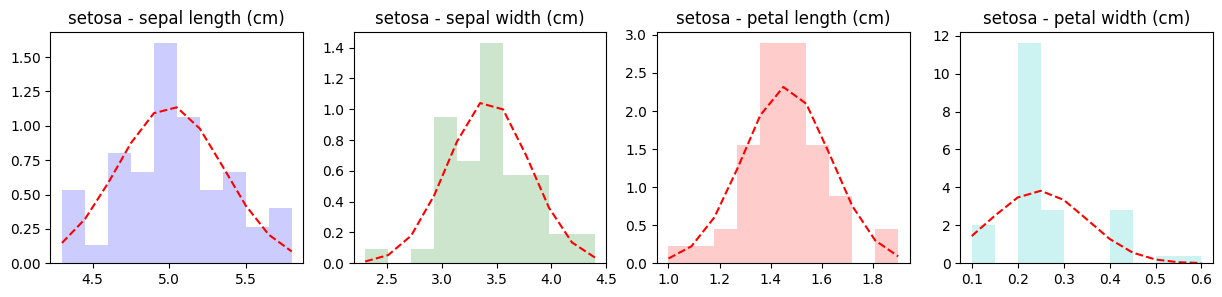

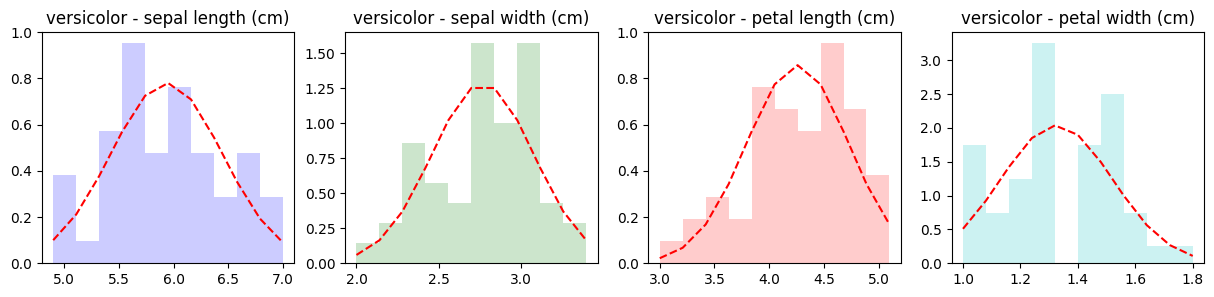

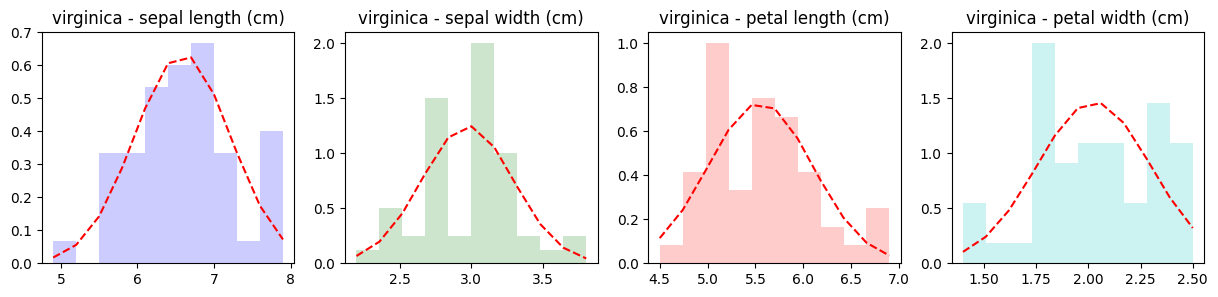

In [11]:
import scipy.stats

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for c in np.unique(y):
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,3))
    
    for i, f in enumerate(iris.feature_names):        
        data = X[np.where(y[...]==c)]
        data = data[:, i]

        n, bins, patches = axs[i].hist(data, density=1, alpha=0.2, facecolor=colors[i])

        mu = np.mean(data) # mean
        sigma = np.std(data) # standard deviation
        
        normpdf = scipy.stats.norm.pdf(bins, mu, sigma)

        axs[i].plot(bins, normpdf, 'r--')
        axs[i].title.set_text("{} - {}".format(iris.target_names[c], f))

# KNN

In [12]:
## Additional import

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# for matter of simplicity we only take the first two features
X = iris.data[:, :2]
y = iris.target

In [15]:
# Use the method 'train_test_split' to use 70 percent of the dataset for trainining and 30 for tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## k - How many Neighbours??
- Start with 3
- Go up to 20
- Which is the best k? (hint use the accuracy as metric)

### Additional imports

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# Initialize a dict to store the accuracies for each value of k
accuracies = {}

for k in range(1, 20):
    # initialize the classifier
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')

    # train it with the 'fit' method (you should pass the training set and the related labels)
    clf.fit(X_train, y_train)
    
    # compute the predictions using the test set
    y_pred = clf.predict(X_test) 

    # Compute the accuracy of the classification
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracies[k] = accuracy

In [18]:
# Print the accuracies for each value of k
for k, accuracy in accuracies.items():
    print("k = %d, accuracy = %f" % (k, accuracy))

k = 1, accuracy = 0.777778
k = 2, accuracy = 0.777778
k = 3, accuracy = 0.755556
k = 4, accuracy = 0.755556
k = 5, accuracy = 0.800000
k = 6, accuracy = 0.777778
k = 7, accuracy = 0.777778
k = 8, accuracy = 0.800000
k = 9, accuracy = 0.800000
k = 10, accuracy = 0.755556
k = 11, accuracy = 0.755556
k = 12, accuracy = 0.755556
k = 13, accuracy = 0.733333
k = 14, accuracy = 0.777778
k = 15, accuracy = 0.777778
k = 16, accuracy = 0.755556
k = 17, accuracy = 0.777778
k = 18, accuracy = 0.777778
k = 19, accuracy = 0.777778


- Repeat using the Manhattan distance. What can you observe?

In [19]:
# Initialize a dict to store the accuracies for each value of k
accuracies_man = {}

for k in range(1, 20):
    # initialize the classifier using the Manhattan distance
    clf = neighbors.KNeighborsClassifier(k, weights='uniform', metric='manhattan')
        
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracies_man[k] = accuracy
    
# Print the accuracies for each value of k
for k, accuracy in accuracies_man.items():
    print("k = %d, accuracy = %f" % (k, accuracy))

k = 1, accuracy = 0.755556
k = 2, accuracy = 0.777778
k = 3, accuracy = 0.755556
k = 4, accuracy = 0.711111
k = 5, accuracy = 0.822222
k = 6, accuracy = 0.800000
k = 7, accuracy = 0.777778
k = 8, accuracy = 0.777778
k = 9, accuracy = 0.777778
k = 10, accuracy = 0.800000
k = 11, accuracy = 0.777778
k = 12, accuracy = 0.777778
k = 13, accuracy = 0.755556
k = 14, accuracy = 0.777778
k = 15, accuracy = 0.777778
k = 16, accuracy = 0.800000
k = 17, accuracy = 0.822222
k = 18, accuracy = 0.755556
k = 19, accuracy = 0.755556


## Classification & Visualization: is train_test split really needed for kNN ?

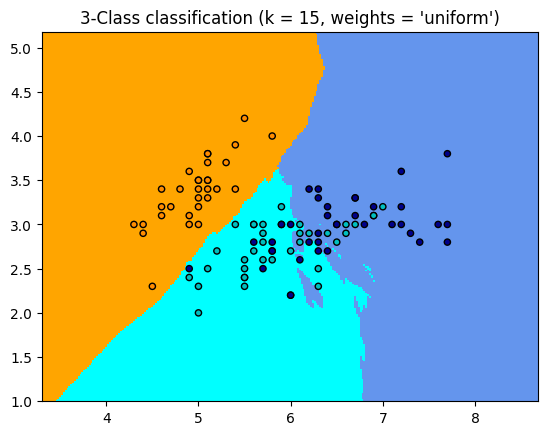

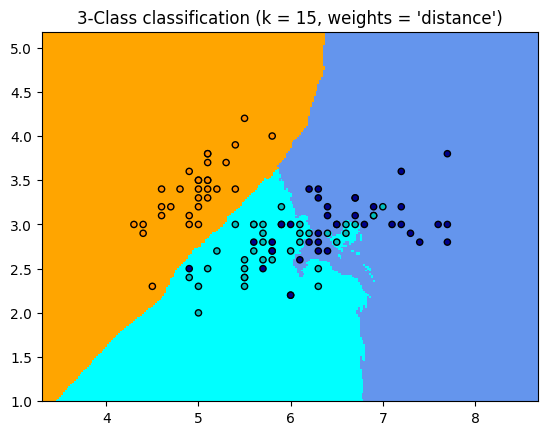

In [20]:
k = 15

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# We test 2 different kinds of weights
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights=weights)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (k, weights))

plt.show()

Repeat the process with 3 dimensions in stead of 2

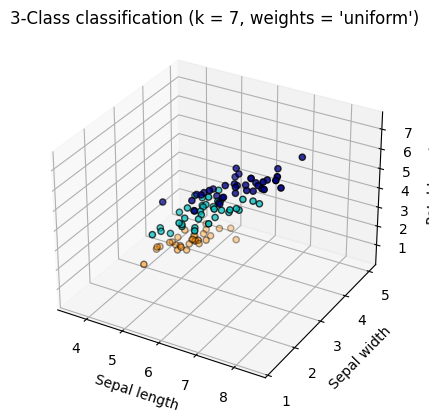

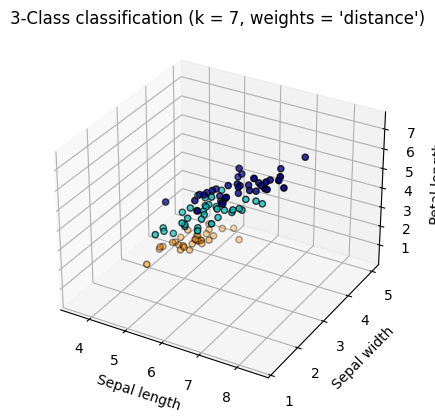

In [21]:
# Repeat th same process using 3 features instead of 2
X = iris.data[:, :3]

# Use the method 'train_test_split' to use 70 percent of the dataset for trainining and 30 for tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 7

h = .1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# We test 2 different kinds of weights, with 3 features

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights=weights)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    z_min, z_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
    
    xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min, z_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
    
    # Plot this shit in 3D mesh
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_zlabel('Petal length')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    
    ax.set_title("3-Class classification (k = %i, weights = '%s')" % (k, weights))
    
    plt.show()